# Manova Extra Assignment

In [71]:
import pandas as pd

url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
data = pd.read_csv(url)
data.head()

,rownames,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


## Checking for missing values

In [72]:
columns = data.columns
null_values = {}
for i, column in enumerate(columns):
    null_values[column] = (data[column].isna().sum())

null_values

{'rownames': 0,
 'rank': 0,
 'discipline': 0,
 'yrs.since.phd': 0,
 'yrs.service': 0,
 'sex': 0,
 'salary': 0}

We can see that we have no missing values so we do not have to impute or delete any data.

## Plotting the data

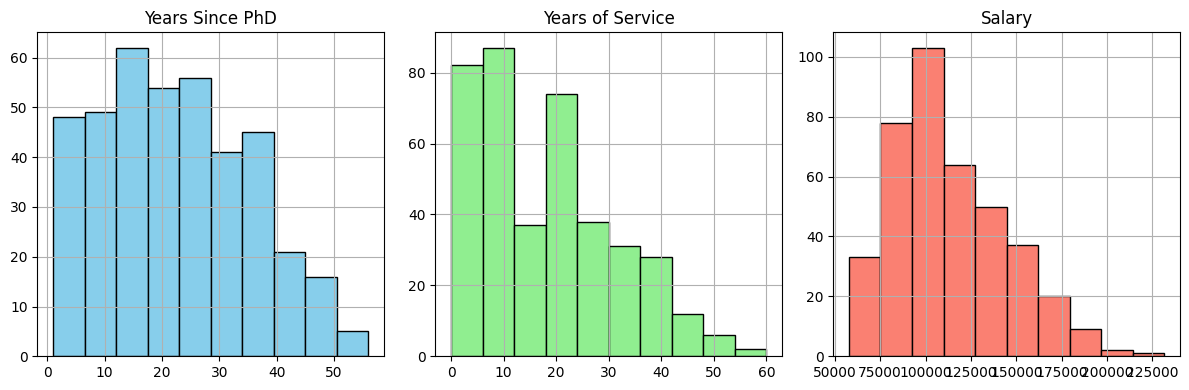

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data['yrs.since.phd'], bins=10, color='skyblue', edgecolor='black')
plt.title('Years Since PhD')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(data['yrs.service'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Years of Service')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(data['salary'], bins=10, color='salmon', edgecolor='black')
plt.title('Salary')
plt.grid(True)

plt.tight_layout()
plt.show()

In [74]:
discipline_counts = data["discipline"].value_counts()
print(discipline_counts)
rank_counts = data["rank"].value_counts()
print(rank_counts)
sex_counts = data["sex"].value_counts()
print(sex_counts)

discipline
B    216
A    181
Name: count, dtype: int64
rank
Prof         266
AsstProf      67
AssocProf     64
Name: count, dtype: int64
sex
Male      358
Female     39
Name: count, dtype: int64


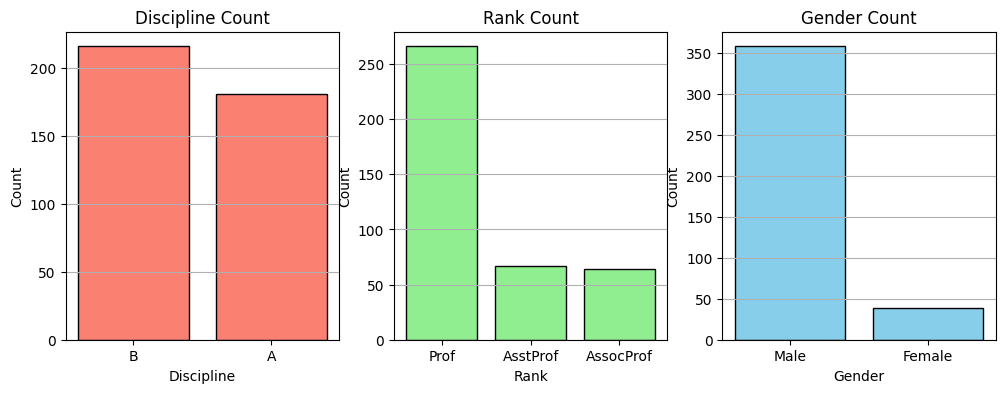

In [75]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(discipline_counts.index, discipline_counts.values, color='salmon', edgecolor='black')
plt.title('Discipline Count')
plt.xlabel('Discipline')
plt.ylabel('Count')
plt.grid(axis='y')

plt.subplot(1, 3, 2)
plt.bar(rank_counts.index, rank_counts.values, color='lightgreen', edgecolor='black')
plt.title('Rank Count')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.grid(axis='y')

plt.subplot(1, 3, 3)
plt.bar(sex_counts.index, sex_counts.values, color='skyblue', edgecolor='black')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

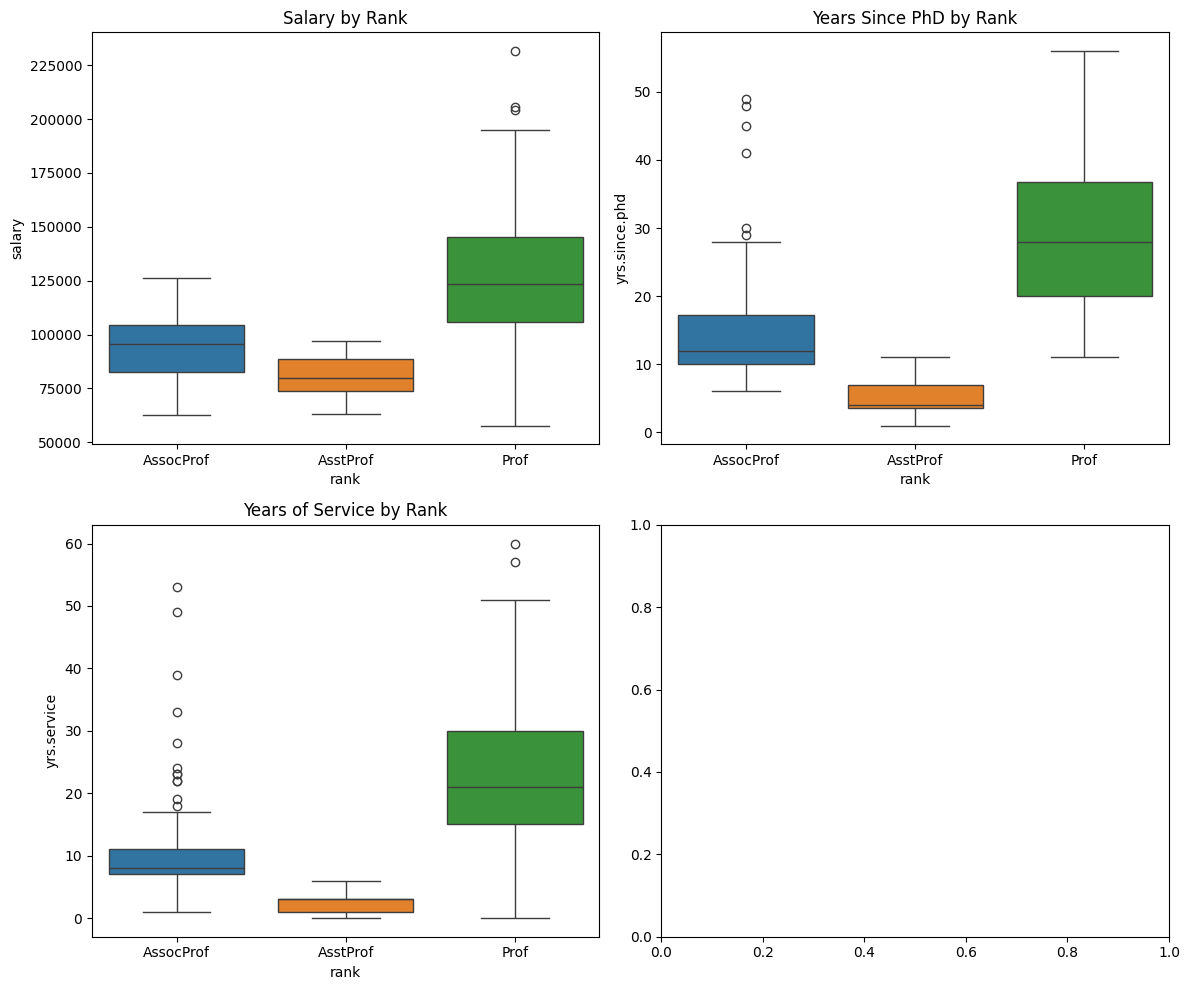

In [76]:
import pandas as pd
import seaborn as sns

categorical_columns = ['rank', 'discipline', 'sex']
data[categorical_columns] = data[categorical_columns].astype('category')

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
sns.boxplot(data=data, x='rank', y='salary', hue='rank', ax=axs[0, 0])
sns.boxplot(data=data, x='rank', y='yrs.since.phd', hue='rank', ax=axs[0, 1])
sns.boxplot(data=data, x='rank', y='yrs.service', hue='rank', ax=axs[1, 0])
axs[0, 0].set_title('Salary by Rank')
axs[0, 1].set_title('Years Since PhD by Rank')
axs[1, 0].set_title('Years of Service by Rank')
plt.tight_layout()
plt.show()


## Preparing the data

In [77]:
# Convert categorical columns to factors
categorical_columns = ['rank', 'discipline', 'sex']
data[categorical_columns] = data[categorical_columns].astype('category')
print(data.dtypes)

rownames            int64
rank             category
discipline       category
yrs.since.phd       int64
yrs.service         int64
sex              category
salary              int64
dtype: object


In [78]:
from scipy import stats
import numpy as np

# Let's try to normialize data using log
data["salary"] = np.log(data["salary"])
data["yrs.since.phd"] = np.log(data["yrs.since.phd"])
data["yrs.service"] = np.log(data["yrs.service"])


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


salary by Prof: Shapiro-Wilk test p-value = 0.40780215998663716
salary by Prof is normally distributed.

salary by AsstProf: Shapiro-Wilk test p-value = 0.03926095305272317
salary by AsstProf is NOT normally distributed.

salary by AssocProf: Shapiro-Wilk test p-value = 0.0761348809096451
salary by AssocProf is normally distributed.

yrs.since.phd by Prof: Shapiro-Wilk test p-value = 0.0001074771245244775
yrs.since.phd by Prof is NOT normally distributed.

yrs.since.phd by AsstProf: Shapiro-Wilk test p-value = 0.00032868370828284353
yrs.since.phd by AsstProf is NOT normally distributed.

yrs.since.phd by AssocProf: Shapiro-Wilk test p-value = 0.00015531935415534265
yrs.since.phd by AssocProf is NOT normally distributed.

yrs.service by Prof: Shapiro-Wilk test p-value = 1.0
yrs.service by Prof is normally distributed.

yrs.service by AsstProf: Shapiro-Wilk test p-value = 1.0
yrs.service by AsstProf is normally distributed.

yrs.service by AssocProf: Shapiro-Wilk test p-value = 3.3519293

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:2000: RuntimeWarning: invalid value encountered in subtract
  y -= x[N//2]  # subtract the median (or a nearby value); see gh-15777
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


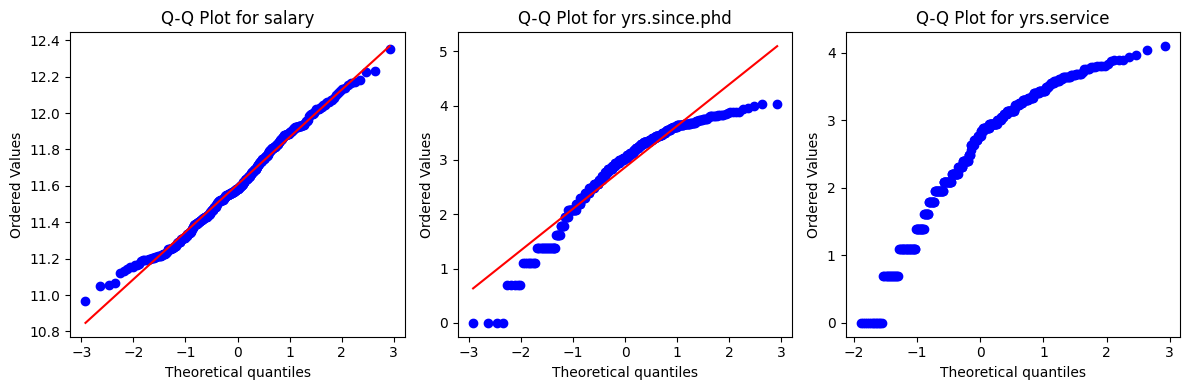

In [79]:
from scipy import stats

# Shapiro-Wilk test for normality for each group
for column in ['salary', 'yrs.since.phd', 'yrs.service']:
    for rank in data['rank'].unique():
        group_data = data[data['rank'] == rank][column]
        stat, p_value = stats.shapiro(group_data)
        print(f'{column} by {rank}: Shapiro-Wilk test p-value = {p_value}')
        if p_value < 0.05:
            print(f'{column} by {rank} is NOT normally distributed.\n')
        else:
            print(f'{column} by {rank} is normally distributed.\n')

# Q-Q plot for visual inspection
plt.figure(figsize=(12, 4))
for i, column in enumerate(['salary', 'yrs.since.phd', 'yrs.service'], 1):
    plt.subplot(1, 3, i)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
plt.tight_layout()
plt.show()

In [80]:
print("\nLevene's test for Salary by Rank:")
grouped_salary = [data[data['rank'] == rank]['salary'] for rank in data['rank'].unique()]
stat, p_value = stats.levene(*grouped_salary)
print(f"Statistic: {stat}, p-value: {p_value}")

# Levene's test on 'yrs.since.phd' by 'rank'
print("\nLevene's test for Years Since PhD by Rank:")
grouped_phd = [data[data['rank'] == rank]['yrs.since.phd'] for rank in data['rank'].unique()]
stat, p_value = stats.levene(*grouped_phd)
print(f"Statistic: {stat}, p-value: {p_value}")

# Levene's test on 'yrs.service' by 'rank'
print("\nLevene's test for Years of Service by Rank:")
grouped_service = [data[data['rank'] == rank]['yrs.service'] for rank in data['rank'].unique()]
stat, p_value = stats.levene(*grouped_service)
print(f"Statistic: {stat}, p-value: {p_value}")


Levene's test for Salary by Rank:
Statistic: 20.44602985141002, p-value: 3.5612664183219986e-09

Levene's test for Years Since PhD by Rank:
Statistic: 5.560541553874789, p-value: 0.004154714767044294

Levene's test for Years of Service by Rank:
Statistic: nan, p-value: nan


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:3336: RuntimeWarning: invalid value encountered in subtract
  numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:3341: RuntimeWarning: invalid value encountered in subtract
  dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)


So Unfortunately data does not meet assumptions very well, however I asked a friend and he told me that MANOVA is can perform well when these violations are not huge :) .

## Performing MANOVA

In [81]:
data.head()

,rownames,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,2.944439,2.890372,Male,11.847610
1,2,Prof,B,2.995732,2.772589,Male,12.062202
2,3,AsstProf,B,1.386294,1.098612,Male,11.286652
3,4,Prof,B,3.806662,3.663562,Male,11.652687
4,5,Prof,B,3.688879,3.713572,Male,11.860055


In [82]:
data["years_phd"] = data["yrs.since.phd"]
data = data.drop("yrs.since.phd", axis=1)
data["years_service"] = data["yrs.service"]
data = data.drop("yrs.service", axis=1)
data.head()

,rownames,rank,discipline,sex,salary,years_phd,years_service
0,1,Prof,B,Male,11.847610,2.944439,2.890372
1,2,Prof,B,Male,12.062202,2.995732,2.772589
2,3,AsstProf,B,Male,11.286652,1.386294,1.098612
3,4,Prof,B,Male,11.652687,3.806662,3.663562
4,5,Prof,B,Male,11.860055,3.688879,3.713572


In [83]:
from sklearn.preprocessing import LabelEncoder

label_encoder_rank = LabelEncoder()
label_encoder_discipline = LabelEncoder()
label_encoder_sex = LabelEncoder()

data['rank'] = label_encoder_rank.fit_transform(data['rank'])
data['discipline'] = label_encoder_discipline.fit_transform(data['discipline'])
data['sex'] = label_encoder_sex.fit_transform(data['sex'])
print(data)


     rownames  rank  discipline  sex     salary  years_phd  years_service
0           1     2           1    1  11.847610   2.944439       2.890372
1           2     2           1    1  12.062202   2.995732       2.772589
2           3     1           1    1  11.286652   1.386294       1.098612
3           4     2           1    1  11.652687   3.806662       3.663562
4           5     2           1    1  11.860055   3.688879       3.713572
..        ...   ...         ...  ...        ...        ...            ...
392       393     2           0    1  11.543513   3.496508       3.401197
393       394     2           0    1  11.922144   3.433987       2.944439
394       395     2           0    1  11.530156   3.737670       3.218876
395       396     2           0    1  11.465089   3.218876       2.708050
396       397     1           0    1  11.302636   2.079442       1.386294

[397 rows x 7 columns]


In [84]:
from statsmodels.multivariate.manova import MANOVA

fit = MANOVA.from_formula('salary + years_phd + years_service ~ rank + discipline + sex', data=data)
print(fit.mv_test())

LinAlgError: SVD did not converge

I am so sorry but I do not know how to make this SVD converge

## Performing Pairwise_tukeyhsd

In [90]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# For salary
tukey_salary = pairwise_tukeyhsd(data['salary'], data['rank'])
print("\nTukey's HSD Test for Salary:")
print(tukey_salary.summary())

# For years_phd
tukey_years_phd = pairwise_tukeyhsd(data['years_phd'], data['rank'])
print("\nTukey's HSD Test for Years Since PhD:")
print(tukey_years_phd.summary())

# For years_service
tukey_years_service = pairwise_tukeyhsd(data['years_service'], data['rank'])
print("\nTukey's HSD Test for Years of Service:")
print(tukey_years_service.summary())



Tukey's HSD Test for Salary:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1443 0.0001 -0.2236 -0.0651   True
     0      2    0.288    0.0  0.2249  0.3512   True
     1      2   0.4323    0.0  0.3704  0.4943   True
----------------------------------------------------

Tukey's HSD Test for Years Since PhD:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -1.1183   0.0 -1.2969 -0.9398   True
     0      2    0.671   0.0  0.5288  0.8132   True
     1      2   1.7894   0.0  1.6497   1.929   True
---------------------------------------------------

Tukey's HSD Test for Years of Service:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
     0  